# First Download Data using api:
https://www.kaggle.com/discussions/general/74235

In [1]:
 !pip install -q kaggle

In [2]:
 from google.colab import files
 # upload json file:
 files.upload()

Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"jackparkinson","key":"01e20c0f4474bf5f6cda58ac1e9a83a4"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
 ! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
! kaggle datasets download -d gpiosenka/100-bird-species

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/100-bird-species
License(s): CC0-1.0
 99% 1.94G/1.96G [00:14<00:00, 149MB/s]
100% 1.96G/1.96G [00:14<00:00, 141MB/s]


## Set up paths

In [6]:
import zipfile
import os

In [7]:
zip_path = '/content/100-bird-species.zip'

# directory to unzip (can change if you want)
extract_to = '/content/birds_dataset'

# removes any current directory with name
if os.path.exists(extract_to):
    !rm -rf {extract_to}

os.makedirs(extract_to, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Unzipping completed!")

Unzipping completed!


In [8]:


train_dir = '/content/birds_dataset/train'
test_dir = '/content/birds_dataset/test'
valid_dir = '/content/birds_dataset/valid'

# counts files
def count_images(directory):
    count = 0
    for _, _, files in os.walk(directory):
        count += len(files)
    return count

train_count = count_images(train_dir)
valid_count = count_images(valid_dir)
test_count = count_images(test_dir)
train_split = train_count / (train_count+test_count+valid_count)
valid_split = valid_count / (train_count+test_count+valid_count)
test_split = test_count / (train_count+test_count+valid_count)


print(f"Number of images in Train: {train_count} with split: {train_split}")
print(f"Number of images in Valid: {valid_count} with split: {valid_split}")
print(f"Number of images in Test: {test_count} with split: {test_split}")

Number of images in Train: 84635 with split: 0.9415920342660066
Number of images in Valid: 2625 with split: 0.029203982866996717
Number of images in Test: 2625 with split: 0.029203982866996717


#### There's an extra space for one of the birds in the train and test dir:

In [9]:
def check_directories(path):
    subdirs = os.listdir(path)
    print(f'Total directories in {path}: {len(subdirs)}')
    return set(os.listdir(path))

# Retrieve the list of species in each directory
train_species = check_directories(train_dir)
test_species = check_directories(test_dir)
valid_species = check_directories(valid_dir)

# Find the union of all species (all species that appear in any directory)
all_species = train_species.union(test_species).union(valid_species)

# Find what is missing from each set
missing_from_train = all_species - train_species
missing_from_test = all_species - test_species
missing_from_valid = all_species - valid_species

print("Species missing from train:", missing_from_train)
print("Species missing from test:", missing_from_test)
print("Species missing from valid:", missing_from_valid)


Total directories in /content/birds_dataset/train: 525
Total directories in /content/birds_dataset/test: 525
Total directories in /content/birds_dataset/valid: 525
Species missing from train: {'PARAKETT AUKLET'}
Species missing from test: {'PARAKETT AUKLET'}
Species missing from valid: {'PARAKETT  AUKLET'}


In [10]:
import os

train_dir = '/content/birds_dataset/train'
test_dir = '/content/birds_dataset/test'

# Define the incorrect and correct paths for train and test
incorrect_path_train = os.path.join(train_dir, 'PARAKETT  AUKLET')
correct_path_train = os.path.join(train_dir, 'PARAKETT AUKLET')

incorrect_path_test = os.path.join(test_dir, 'PARAKETT  AUKLET')
correct_path_test = os.path.join(test_dir, 'PARAKETT AUKLET')

# Rename the directories in train and test
try:
    os.rename(incorrect_path_train, correct_path_train)
    print(f"Renamed in train from '{incorrect_path_train}' to '{correct_path_train}'")
except FileNotFoundError as e:
    print(f"Error in train rename: {e}")

try:
    os.rename(incorrect_path_test, correct_path_test)
    print(f"Renamed in test from '{incorrect_path_test}' to '{correct_path_test}'")
except FileNotFoundError as e:
    print(f"Error in test rename: {e}")


Renamed in train from '/content/birds_dataset/train/PARAKETT  AUKLET' to '/content/birds_dataset/train/PARAKETT AUKLET'
Renamed in test from '/content/birds_dataset/test/PARAKETT  AUKLET' to '/content/birds_dataset/test/PARAKETT AUKLET'


In [11]:
def check_directories(path):
    subdirs = os.listdir(path)
    print(f'Total directories in {path}: {len(subdirs)}')
    return set(os.listdir(path))

# Retrieve the list of species in each directory
train_species = check_directories(train_dir)
test_species = check_directories(test_dir)
valid_species = check_directories(valid_dir)

# Find the union of all species (all species that appear in any directory)
all_species = train_species.union(test_species).union(valid_species)

# Find what is missing from each set
missing_from_train = all_species - train_species
missing_from_test = all_species - test_species
missing_from_valid = all_species - valid_species

print("Species missing from train:", missing_from_train)
print("Species missing from test:", missing_from_test)
print("Species missing from valid:", missing_from_valid)


Total directories in /content/birds_dataset/train: 525
Total directories in /content/birds_dataset/test: 525
Total directories in /content/birds_dataset/valid: 525
Species missing from train: set()
Species missing from test: set()
Species missing from valid: set()


## Move around images so its roughly 80/10/10 split:
Can manually specify a different split by choosing num_test_files and num_valid_files variables

In [12]:
import os
import shutil

def adjust_dataset_split(train_dir, test_dir, valid_dir, num_test_files, num_valid_files):
    # iterates through each species directory in the train directory
    for species in os.listdir(train_dir):
        species_train_dir = os.path.join(train_dir, species)
        species_test_dir = os.path.join(test_dir, species)
        species_valid_dir = os.path.join(valid_dir, species)

        # train directory files for each species
        files = os.listdir(species_train_dir)

        # ensures test and valid directories exist
        os.makedirs(species_test_dir, exist_ok=True)
        os.makedirs(species_valid_dir, exist_ok=True)

        # move files to test
        for file in files[:num_test_files]:
            shutil.move(os.path.join(species_train_dir, file), os.path.join(species_test_dir, file))

        # update list of files remaining in train
        remaining_files = os.listdir(species_train_dir)

        # move files to valid
        for file in remaining_files[:num_valid_files]:
            shutil.move(os.path.join(species_train_dir, file), os.path.join(species_valid_dir, file))


# specify number of files to move to respective dirs
num_test_files = 10
num_valid_files = 10


adjust_dataset_split(train_dir, test_dir, valid_dir, num_test_files, num_valid_files)
print("Files have been moved to achieve the specified dataset split.")


Files have been moved to achieve the specified dataset split.


In [13]:
train_count = count_images(train_dir)
valid_count = count_images(valid_dir)
test_count = count_images(test_dir)
train_split = train_count / (train_count+test_count+valid_count)
valid_split = valid_count / (train_count+test_count+valid_count)
test_split = test_count / (train_count+test_count+valid_count)


print(f"Number of images in Train: {train_count} with proportion: {train_split}")
print(f"Number of images in Valid: {valid_count} with proportion: {valid_split}")
print(f"Number of images in Test: {test_count} with proportion: {test_split}")

Number of images in Train: 74135 with proportion: 0.8247761027980197
Number of images in Valid: 7875 with proportion: 0.08761194860099016
Number of images in Test: 7875 with proportion: 0.08761194860099016


In [14]:
def check_directories(path):
    subdirs = os.listdir(path)
    print(f'Total directories in {path}: {len(subdirs)}')
    return set(os.listdir(path))

# Retrieve the list of species in each directory
train_species = check_directories(train_dir)
test_species = check_directories(test_dir)
valid_species = check_directories(valid_dir)

# Find the union of all species (all species that appear in any directory)
all_species = train_species.union(test_species).union(valid_species)

# Find what is missing from each set
missing_from_train = all_species - train_species
missing_from_test = all_species - test_species
missing_from_valid = all_species - valid_species

print("Species missing from train:", missing_from_train)
print("Species missing from test:", missing_from_test)
print("Species missing from valid:", missing_from_valid)


Total directories in /content/birds_dataset/train: 525
Total directories in /content/birds_dataset/test: 525
Total directories in /content/birds_dataset/valid: 525
Species missing from train: set()
Species missing from test: set()
Species missing from valid: set()


## most frequent 50 birds:

In [15]:
# import shutil

# def filter_directory(source_dir, target_dir, top_species):
#     if not os.path.exists(target_dir):
#         os.makedirs(target_dir)
#     for species in top_species:
#         source_species_path = os.path.join(source_dir, species)
#         target_species_path = os.path.join(target_dir, species)
#         if os.path.exists(source_species_path):
#             shutil.copytree(source_species_path, target_species_path)

# # Define your directory paths
# original_train_dir = '/content/birds_dataset/train'
# original_valid_dir = '/content/birds_dataset/valid'
# original_test_dir = '/content/birds_dataset/test'

# # Target directories for top 50 species
# filtered_train_dir = '/content/birds_dataset_filtered/train'
# filtered_valid_dir = '/content/birds_dataset_filtered/valid'
# filtered_test_dir = '/content/birds_dataset_filtered/test'

# # Filter the directories
# filter_directory(original_train_dir, filtered_train_dir, top_50_species)
# filter_directory(original_valid_dir, filtered_valid_dir, top_50_species)
# filter_directory(original_test_dir, filtered_test_dir, top_50_species)


In [16]:
from tensorflow.keras.preprocessing import image_dataset_from_directory





img_size = 224
batch_size = 32

train_data = image_dataset_from_directory(
    train_dir,
    image_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=True
)

val_data = image_dataset_from_directory(
    valid_dir,
    image_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=False
)

test_data = image_dataset_from_directory(
    test_dir,
    image_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=False
)


Found 74135 files belonging to 525 classes.
Found 7875 files belonging to 525 classes.
Found 7875 files belonging to 525 classes.


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50


In [18]:
import numpy as np
import tensorflow as tf

def compute_image_statistics(data_generator):
    all_images = []
    for images, _ in data_generator.take(10):  # Take 10 batches
        all_images.append(images.numpy())
    all_images = np.concatenate(all_images)
    mean = np.mean(all_images, axis=(0, 1, 2))
    std = np.std(all_images, axis=(0, 1, 2))
    return mean, std

# Assuming 'train_data' is your training dataset loaded with tf.keras.utils.image_dataset_from_directory
mean, std = compute_image_statistics(train_data)
print(f"Mean: {mean}, Standard Deviation: {std}")

# Compare these values to ImageNet's mean and std
print("ImageNet means: ([123.68, 116.779, 103.939]), ", )

Mean: [119.19461 117.36251  98.66595], Standard Deviation: [60.63031  58.590107 64.38694 ]
ImageNet means: ([123.68, 116.779, 103.939]), 


In [19]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import Lambda, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential([
    Lambda(preprocess_input, input_shape=(224, 224, 3), name='preprocessing'),
    ResNet50(include_top=False, pooling='avg', weights='imagenet'),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(525, activation='softmax')  # Adjusted for 50 classes
])


94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy', #for integer class numbers
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    train_data,
    epochs=20,  # Number of epochs to train for
    validation_data=val_data,  # Validation data to evaluate the model
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)],
    verbose = 1
)


Epoch 1/20
 400/2317 [====>.........................] - ETA: 1:58 - loss: 5.4183 - accuracy: 0.0895

KeyboardInterrupt: 

In [ ]:
# Save the entire model to a file
model.save('path_to_my_model.h5')

# Alternatively, you can save just the weights
model.save_weights('path_to_my_weights.h5')


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [ ]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


In [20]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Lambda, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Load the ResNet50 model with pre-trained weights and without the top classification layer
resnet_base = ResNet50(include_top=False, pooling='avg', weights='imagenet', input_shape=(224, 224, 3))

# Freeze all the layers in the ResNet50 model
for layer in resnet_base.layers:
    layer.trainable = False

# Create the Sequential model and add the ResNet50 model
model = Sequential([
    Lambda(preprocess_input, input_shape=(224, 224, 3), name='preprocessing'),
    resnet_base,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(525, activation='softmax')  # Adjust the number of classes if necessary
])


In [ ]:
# model.layers[1].trainable = False

In [21]:
# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1, min_lr=0.00001)

# Early stopping to stop training when validation loss has stopped improving
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model with the scheduler and early stopping
history = model.fit(train_data,
                    epochs=30,
                    validation_data=val_data,
                    callbacks=[reduce_lr, early_stopping],  # Include the ReduceLROnPlateau and EarlyStopping callbacks
                    verbose=1)

Epoch 1/30
2317/2317 [==============================] - 74s 29ms/step - loss: 3.6667 - accuracy: 0.2775 - val_loss: 1.4476 - val_accuracy: 0.7487 - lr: 1.0000e-04
Epoch 2/30
2317/2317 [==============================] - 64s 28ms/step - loss: 1.6103 - accuracy: 0.6087 - val_loss: 0.8404 - val_accuracy: 0.8310 - lr: 1.0000e-04
Epoch 3/30
2317/2317 [==============================] - 64s 28ms/step - loss: 1.1066 - accuracy: 0.7210 - val_loss: 0.6221 - val_accuracy: 0.8639 - lr: 1.0000e-04
Epoch 4/30
2317/2317 [==============================] - 64s 28ms/step - loss: 0.8652 - accuracy: 0.7759 - val_loss: 0.5230 - val_accuracy: 0.8808 - lr: 1.0000e-04
Epoch 5/30
2317/2317 [==============================] - 64s 28ms/step - loss: 0.7053 - accuracy: 0.8152 - val_loss: 0.4589 - val_accuracy: 0.8926 - lr: 1.0000e-04
Epoch 6/30
2317/2317 [==============================] - 64s 28ms/step - loss: 0.5991 - accuracy: 0.8409 - val_loss: 0.4248 - val_accuracy: 0.8977 - lr: 1.0000e-04
Epoch 7/30
2317/2317 [

In [22]:
# Save the entire model to a file
model.save('path_to_my_model3_freeze.h5')

# Alternatively, you can save just the weights
model.save_weights('path_to_my_weights3_freeze.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


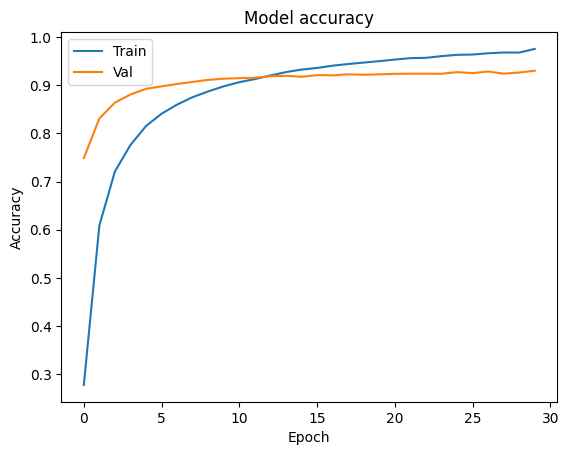

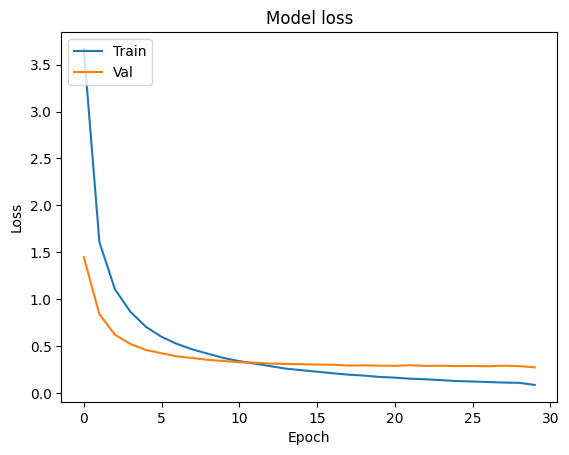

In [23]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [24]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


247/247 [==============================] - 6s 24ms/step - loss: 0.2455 - accuracy: 0.9341
Test Loss: 0.24546992778778076
Test Accuracy: 0.9340952634811401


In [25]:
# Assuming the model has already been trained and the best weights have been restored

# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(train_data)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


2317/2317 [==============================] - 56s 24ms/step - loss: 0.0153 - accuracy: 0.9978
Train Loss: 0.015323727391660213
Train Accuracy: 0.9978147745132446
247/247 [==============================] - 6s 24ms/step - loss: 0.2741 - accuracy: 0.9302
Validation Loss: 0.274085134267807
Validation Accuracy: 0.9301587343215942
247/247 [==============================] - 6s 24ms/step - loss: 0.2455 - accuracy: 0.9341
Test Loss: 0.24546994268894196
Test Accuracy: 0.9340952634811401
